In [113]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/employees.csv")

a.I) numarul de angajati

In [114]:
print(df.shape[0])

1000


a.II) numar si tipul informatiilor (proprietatilor) detinute pentru un angajat

In [115]:
print(len(df.columns.tolist()))
print(df.dtypes)

8
First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object


a.III) numarul de angajati pentru care se detin date complete

In [116]:
print(df.dropna().shape[0])

764


a.IV)  valorile minime, maxime, medii pentru fiecare proprietate \
in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate \
daca sunt valori lipsa si cum se poate rezolva aceasta problema 

In [117]:
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
      print(column + ": min - " + str(df[column].dropna().min()) + ", max - " + str(df[column].dropna().max()) + ", mean - " + str(df[column].dropna().mean()))
    else:
      print(column + ": " + str(df[column].dropna().nunique()))

First Name: 200
Gender: 2
Start Date: 972
Last Login Time: 720
Salary: min - 35013, max - 149908, mean - 90662.181
Bonus %: min - 1.015, max - 19.944, mean - 10.207555000000001
Senior Management: 2
Team: 10


b.I) distributia salariilor acestor angajati pe categorii de salar

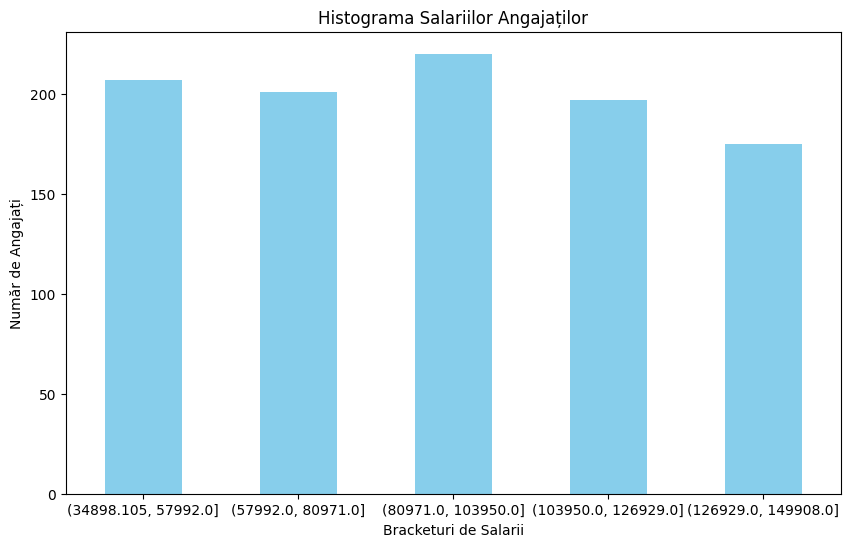

In [118]:

salaries = df['Salary']
min_salary = salaries.min()
max_salary = salaries.max()
num_bins = 5  

bins = pd.cut(salaries, bins=num_bins)

employee_counts = bins.value_counts().sort_index()

# Construim histograma
plt.figure(figsize=(10, 6))
employee_counts.plot(kind='bar', color='skyblue')
plt.title('Histograma Salariilor Angajaților')
plt.xlabel('Bracketuri de Salarii')
plt.ylabel('Număr de Angajați')
plt.xticks(rotation=0)
plt.show()



b.II) distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte

C:\Users\andre\AppData\Local\Temp\ipykernel_5004\2594888545.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Salary Bracket', 'Team']).size().unstack()


<Figure size 3000x1400 with 0 Axes>

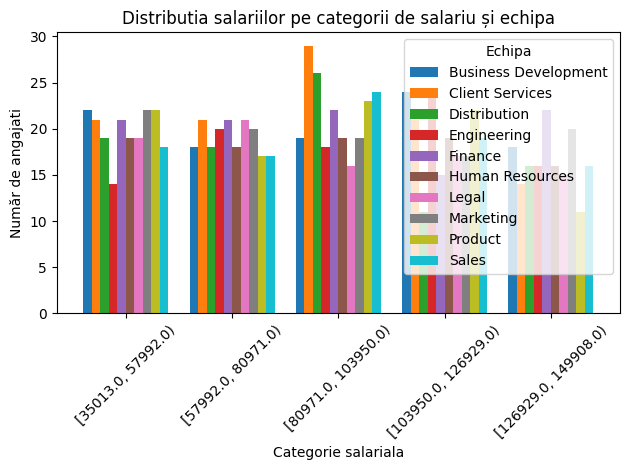

In [121]:

salaries = df["Salary"]
max_salary = salaries.max()
min_salary = salaries.min()
salary_range = max_salary - min_salary
num_bins = 5 

bin_size = salary_range / num_bins
bins = [min_salary + i * bin_size for i in range(num_bins)]
bins.append(max_salary)

df['Salary Bracket'] = pd.cut(df['Salary'], bins=bins, include_lowest=True, right=False)

plt.figure(figsize=(20, 14))
df_grouped = df.groupby(['Salary Bracket', 'Team']).size().unstack()
df_grouped.plot(kind='bar', stacked=False, width=0.8)  # Modificare tip grafic și lățime bare
plt.title('Distributia salariilor pe categorii de salariu și echipa')
plt.xlabel('Categorie salariala')
plt.ylabel('Număr de angajati')
plt.xticks(rotation=45)
plt.legend(title='Echipa')
plt.tight_layout()
plt.show()

b.III) 

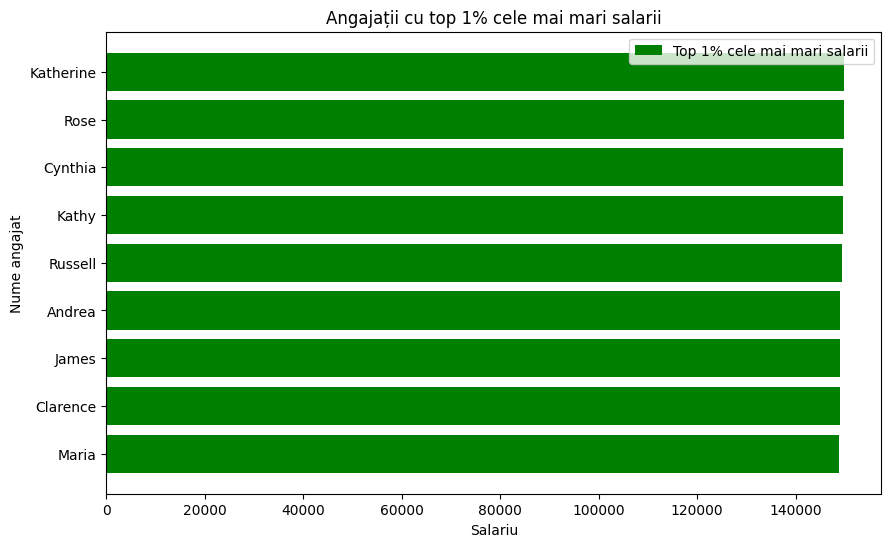

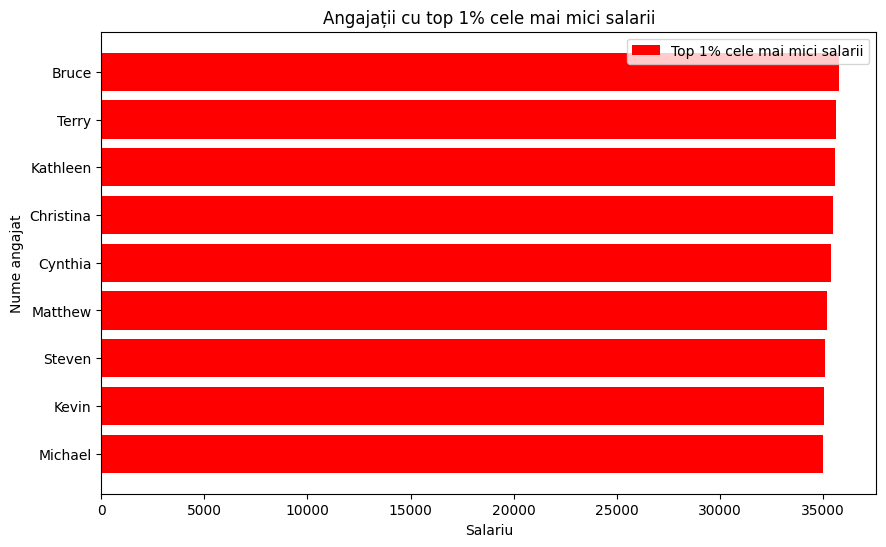

In [120]:
df_sorted = df.dropna(subset=['First Name', 'Salary']).sort_values(by='Salary')

num_employees = len(df_sorted)
num_top_1_percent = int(num_employees * 0.01)
num_bottom_1_percent = int(num_employees * 0.01)

top_1_percent = df_sorted.tail(num_top_1_percent)
bottom_1_percent = df_sorted.head(num_bottom_1_percent)

plt.figure(figsize=(10, 6))
plt.barh(top_1_percent['First Name'], top_1_percent['Salary'], color='green', label='Top 1% cele mai mari salarii')
plt.xlabel('Salariu')
plt.ylabel('Nume angajat')
plt.title('Angajații cu top 1% cele mai mari salarii')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(bottom_1_percent['First Name'], bottom_1_percent['Salary'], color='red', label='Top 1% cele mai mici salarii')
plt.xlabel('Salariu')
plt.ylabel('Nume angajat')
plt.title('Angajații cu top 1% cele mai mici salarii')
plt.legend()
plt.show()